In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [19]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.W1 = np.zeros((hidden_size, input_size))
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.zeros((output_size, hidden_size))
        self.b2 = np.zeros((output_size, 1))

    def relu(self, Z):
        return np.maximum(0, Z)

    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

    def forward_pass(self, X):
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = self.relu(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        A2 = self.softmax(Z2)
        return A2

    def load_model(self, filename):
        data = np.load(filename)
        self.W1 = data['W1']
        self.b1 = data['b1']
        self.W2 = data['W2']
        self.b2 = data['b2']

    def predict_single(self, x):
        x = x.reshape(-1, 1)
        A2 = self.forward_pass(x)
        prediction = np.argmax(A2, axis=0)
        return prediction[0]

In [20]:
mnist_data = np.load('mnist.npz')
X_test = mnist_data['x_test']
y_test = mnist_data['y_test']

In [21]:
X_test = X_test / 255.0
X_test = X_test.reshape(X_test.shape[0], -1)  # flatten
X_test = X_test.T  # (784, 10000)

In [22]:
model = NeuralNetwork(input_size=784, hidden_size=128, output_size=10)
model.load_model('mnist_trained_model.npz')

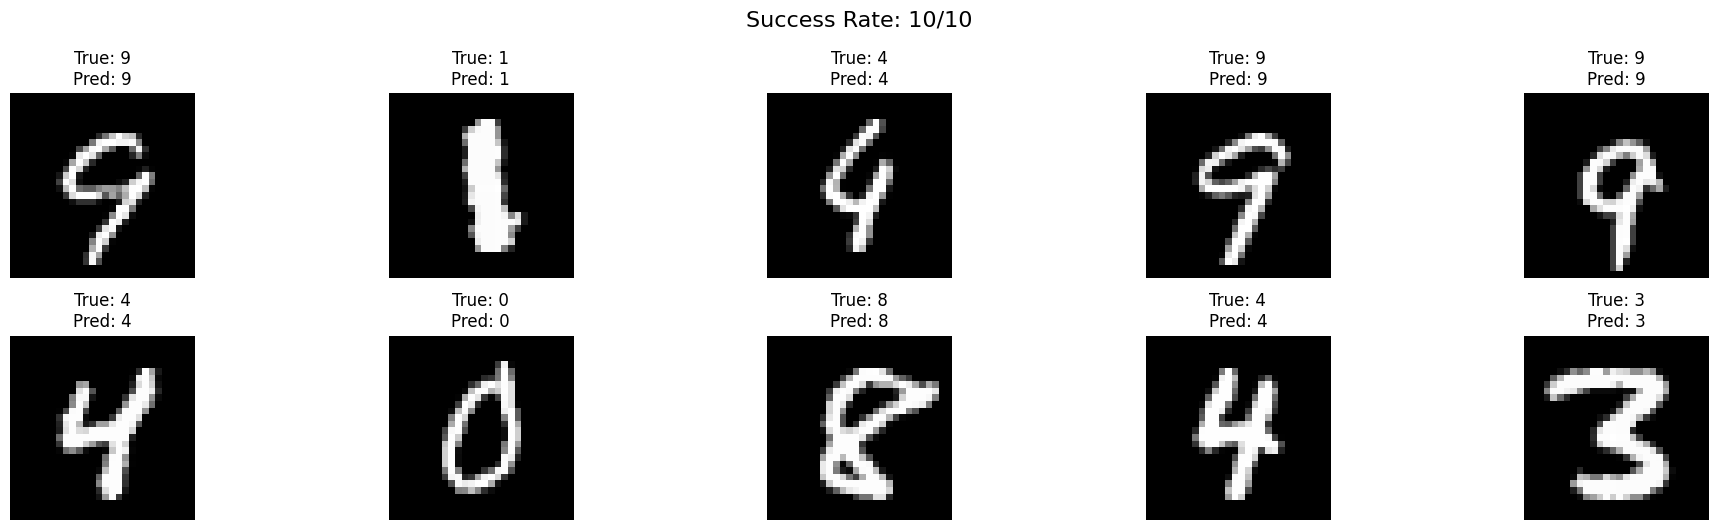

In [36]:
plt.figure(figsize=(20, 5))
correct = 0
for i in range(10):
    sample_index = random.randint(0, X_test.shape[1] - 1)
    sample_image = X_test[:, sample_index]
    sample_label = y_test[sample_index]

    predicted_label = model.predict_single(sample_image)

    if predicted_label == sample_label:
        correct += 1

    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_image.reshape(28, 28), cmap='gray')
    plt.title(f"True: {sample_label}\nPrediction: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.suptitle(f"Success Rate: {correct}/10", fontsize=16, y=1.05)
plt.show()